<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-preview" data-toc-modified-id="Data-preview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data preview</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data preprocessing</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Calculations-and-adding-the-results-to-the-table" data-toc-modified-id="Calculations-and-adding-the-results-to-the-table-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Calculations and adding the results to the table</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Exploratory-data-analysis" data-toc-modified-id="Exploratory-data-analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploratory data analysis</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#General-conclusion" data-toc-modified-id="General-conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>General conclusion</a></span></li></ul></div>

# Research of ads of appartments for sale

The research is based on the data of the Yandex service. It is an archive of ads of apartments for sale in St. Petersburg and neighboring settlements for several years. It is necessary to determine the market value of real estate units. Our task is to set the parameters. This will allow to build an automated system with a goal to track anomalies and fraud activity.

There are two types of data available for each apartment for sale. The first ones are filled in  by the user, the second ones are obtained automatically based on cartographic data. For example, the distance to the center, the airport, the nearest park or pond.
 

## Data preview

In [46]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(data.head(10)) # getting the table and using the '\t' separator

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [47]:
data.info() # getting the general information obn the table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:

data['last_price'].min() # 12190.0
data['last_price'].max() # 763000000.0
data['first_day_exposition'].value_counts()
data['rooms'].value_counts()
data['ceiling_height'].describe()
data['floors_total'].describe()
data['living_area'].describe()
data['floor'].value_counts()
data['is_apartment'].value_counts() # False 2725, True 50
data['kitchen_area'].describe()
data['balcony'].value_counts()
data['locality_name'].unique()
data['ceiling_height'].describe(include='o')


count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

### Conclusion

The table contains 22 columns and 23699 rows. The data type in all columns is either bool, float64, int64 or object.

There are no mistakes in the column names, however, the number of values in the columns varies. It indicates  missing values in the data.

We checked the data in columns using the value_counts() method. It was logical to take a look at the minimum and maximum values in some columns, for example, for `last_price`. We found out that the cheapest apartment cost 12190 which is strangely low. However, nothing unusual was found in the columns `total_images`,` total_area`, ` rooms`, `floors_total`, `living_area`, `floor`,` kitchen_area`,` balcony`. In the `first_day_exposition` column, the date is written in the yyyy-mm-dd format and merged with time that makes the perception of such data inconvenient. We also see that most of the ads were published in early 2018 and late 2017. In the `ceiling_height` column, we see strange ceiling height values such as 100 and 27 meters, possibly an error during unloading or when filling in.  Bool type is expected in the `is_apartment` column  but  we see the object type. Perhaps the data was fillied in incorrectly or was not filled in at all.  It is clear that something is missing  in` locality_name` and there are name options for the village of Murino and the town of Murino.

The data was downloaded from two sources, perhaps this was the reason for such a large number of gaps. It is necessary to work with them.




## Data preprocessing


In [48]:
# using isna() to find gaps and counting them with  len()
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [49]:
# working on replacing the gaps in ceiling_height; replaced all the gaps with the standard ceiling height in the new building
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = 2.7


# working on replacing the gaps in living_area; it is  logical to replace them with the median value
#data.loc[data['living_area'].isna(), 'living_area'] = data['living_area'].sort_values(ascending=True).median()
data['living_ratio'] = data['living_area'] / data['total_area']
# inserting and filling in with grouping by rooms
data['living_ratio'] = data['living_ratio'].fillna(data['living_ratio'].median()) 
# filling in the gaps of the living area
isna_filter = data['living_area'].isna()
data.loc[isna_filter, 'living_area'] = data.loc[isna_filter, 'total_area'] * data.loc[isna_filter, 'living_ratio']  

# working on replacing gaps in is_apartment; the share of gaps is significant but they should be replaced with False, since people who have apartments would answer yes
data.loc[data['is_apartment'].isna(), 'is_apartment'] = False

# # working on replacing gaps in kitchen_area; their share is 9.6%. Let's change them to the median value
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = data['kitchen_area'].sort_values(ascending=True).median()

# # working on replacing the gaps in balcony; it is logical to replace them with 0, since if a person did not specify the number of balconies, apparently there were none
data.loc[data['balcony'].isna(), 'balcony'] = 0

# # working on replacing gaps in locality_name; here they can be replaced with unknown, their share is insignificant
data['locality_name'] = data['locality_name'].fillna('unknown')



<AxesSubplot:xlabel='first_day_exposition'>

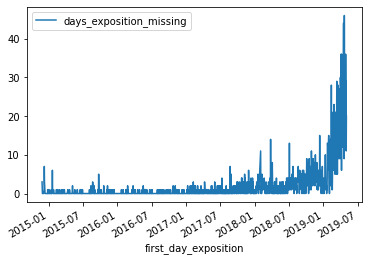

In [51]:
# working on replacing the gaps in days_exposition
# first we look at where these the gaps occur

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# created a column to see if there was a gap in the data
data['days_exposition_missing'] = data['days_exposition'].isna().astype(int)
# plotting a graph, we see that the gaps occur at the end of the observed period, it is logical not to fill them in, since these are most likely open ads
data.groupby('first_day_exposition').agg({'days_exposition_missing': 'sum'}).plot()


                

In [52]:
data['locality_name'] = data['locality_name'].str.replace('поселок', 'посёлок')

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23699 non-null  int64         
 1   last_price               23699 non-null  float64       
 2   total_area               23699 non-null  float64       
 3   first_day_exposition     23699 non-null  datetime64[ns]
 4   rooms                    23699 non-null  int64         
 5   ceiling_height           23699 non-null  float64       
 6   floors_total             23613 non-null  float64       
 7   living_area              23699 non-null  float64       
 8   floor                    23699 non-null  int64         
 9   is_apartment             23699 non-null  object        
 10  studio                   23699 non-null  bool          
 11  open_plan                23699 non-null  bool          
 12  kitchen_area             23699 n

### Conclusion

The data.isna().sum() method revealed gaps in the following columns: `living_area`, `floors_total`, `ceiling_height`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest` and `days_exposition`.

To fill in the gaps we used:

- average values were found on the Internet for columns with `ceiling height` and `number of floors`;
- for `is_apartment` the value was set to False, since it is logical to assume that people who own apartments would indicate this;
- in the column with the number of balconies, the gaps were replaced with 0 (if the person did not specify a balcony, most likely there is none);
- in `days_exposition` the gaps should not be replaced, since they occur mainly in 2019, most likely they are just open ads;
- in `locality_name` the omissions were replaced by unknown;
- for the other columns where there are gaps, it seems logical to replace them with median values.

While filling in the gaps, some data types were also replaced. The `first_day_exposition` column was converted to datetime64, `is_apartment` - in bool. We also removed the word "town" and replaced it with "village".

As a result, we saw a fairly large number of gaps. The main reason, most likely, is that some of the data was filled in by people manually.



## Calculations and adding the results to the table

In [54]:
# calculating the cost of a square meter based on the cost and area of the apartment and adding a new column
data['square_meter'] = data['last_price'] / data['total_area']


In [55]:
# creating columns with the day, month and year of publication
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year


In [56]:
# creating a function to split the floors into groups
def floors(row):
    if row['floor'] == 1:
        return 'first'
    if row['floor'] == row['floors_total']:
        return 'last'
    else:
        return 'other'
data['floor_group'] = data.apply(floors, axis=1)


In [57]:
# creating 2 columns and adding  the ratio of the living and total area and the kitchen area to the total
data['living_to_total'] = data['living_area'] / data['total_area']
data['kitchen_to_living'] = data['kitchen_area'] / data['total_area']

### Conclusion
In this paragraph the columns with the following indicators have been added:
- cost per square meter;
- day, month and year of publication;
- number of floors divided into groups;
- the ratio of living and total area and kitchen area to total


## Exploratory data analysis

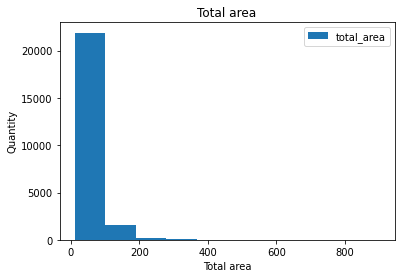

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


In [59]:
# studying of the parameters: area, price, number of rooms, ceiling height
# building a histogram
import matplotlib.pyplot as plt 
data.plot(y = 'total_area', kind = 'hist', title = 'Total area')
plt.xlabel('Total area')
plt.ylabel('Quantity')
plt.show()
# checking the data
print(data['total_area'].describe())

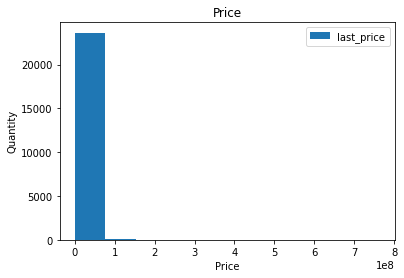

count        23699.000000
mean       6541548.771552
std       10887013.267545
min          12190.000000
25%        3400000.000000
50%        4650000.000000
75%        6800000.000000
max      763000000.000000
Name: last_price, dtype: object


In [60]:
# building a histogram 
data.plot(y = 'last_price', kind = 'hist', title ='Price')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.show()
# checking the data
print(data['last_price'].describe().apply(lambda x: format(x, 'f')))

It is obvious from the histogram that the average price is 6541548 Rub, the median price is 4650000 Rub. The minimum and maximum price is questionable, most likely we will have to work with the statistical outliers.

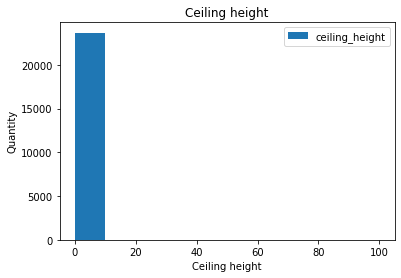

count    23699.000000
mean         2.743758
std          0.987138
min          1.000000
25%          2.600000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


In [61]:
# building a histogram  
data.plot(y = 'ceiling_height', kind = 'hist', bins = 10, range=(0,100),  title ='Ceiling height')
plt.xlabel('Ceiling height')
plt.ylabel('Quantity')
plt.show()
# checking the data
print(data['ceiling_height'].describe())
high_ceiling = data.query('ceiling_height > 4')
low_ceiling = data.query('ceiling_height < 2')


We see that the average and median ceilings are 2.7 meters. We can also observe strange values in the minimum and maximum values.

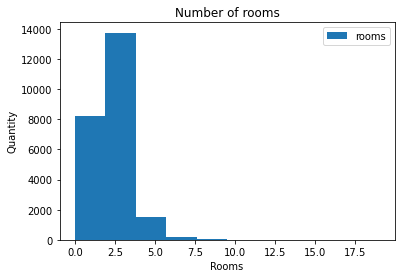

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


In [62]:
# building a histogram
data.plot(y = 'rooms', kind = 'hist', title = 'Number of rooms')
plt.xlabel('Rooms')
plt.ylabel('Quantity')
plt.show()
# checking the data
print(data['rooms'].describe())

We can see from the histogram that the average and median number of rooms is 2. The data also suggests that majority of the apartments have from 1 to 3 rooms, there are anomalies, we will process them later.

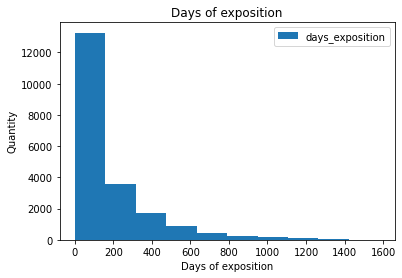

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


In [63]:
# building a histogram
data.plot(y = 'days_exposition', kind = 'hist', title = 'Days of exposition')
plt.xlabel('Days of exposition')
plt.ylabel('Quantity')
plt.show()
# checking the list of characteristic values
print(data['days_exposition'].describe())


The average time for the sale of an apartment is 180 days. The median time of sale is 95 days. We took this data from the table obtained by the describe() method. We see that usually the sale lasts no more than 230 days. From  the quartiles we can estimate a quick and long sale, these are 45 days and 232 days respectively. We see that apartments are mostly sold in about 180 days, long sales on the chart are viewed up to the value of 500, and values more than 500 practically merge with zero. This is an unusually long sale.

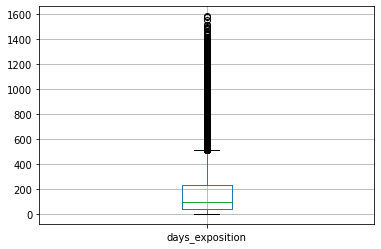

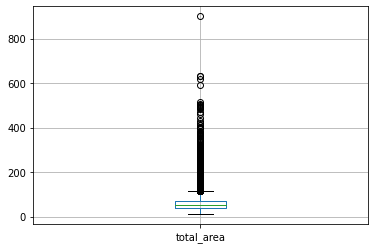

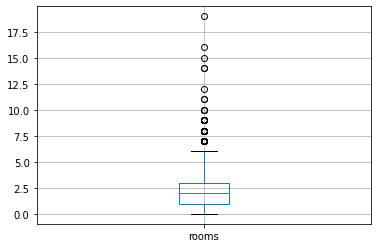

In [64]:
data.boxplot(column = 'days_exposition')
plt.show()
data.boxplot(column = 'total_area')
plt.show()
data.boxplot(column = 'rooms')
plt.show()


The span chart confirms that values greater than 500 go beyond the span (1.5 sqm), which means that this is an unusually long sales. The lower range coincides with zero, which means that even sales faster than 45 days are not anomalies, but anyway, they are rare. Next, we need to remove outliers from the rooms column. From the diagrams we see that apartments with more than 6 rooms are anomalies. In the total_area column outliers start with a value of 180 m. For last_price, the normal price can be considered from 1000000 to 35000000. Let's remove the outliers.


In [65]:
data.query('last_price > 1000000 and last_price < 35000000')
new_data = data.query('days_exposition < 500 and rooms < 6 and total_area < 180 and ceiling_height < 5')


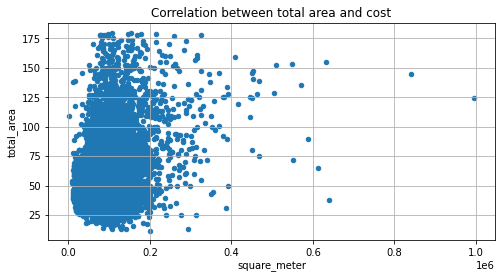

0.19997195597993758


In [66]:
# Next, it is necessary to identify the relationship between the cost of the apartment and its area
new_data.plot(kind = 'scatter', x='square_meter', y='total_area', title ='Correlation between total area and cost',  grid=True, figsize=(8,4))
plt.show()
print(new_data['square_meter'].corr(new_data['total_area']))


,last_price
rooms,
0,2.856248e+06
1,3.764206e+06
2,5.346325e+06
3,7.531625e+06
4,1.039657e+07
5,1.345066e+07


<AxesSubplot:title={'center':'Correlation between the price and the number of rooms'}, xlabel='rooms'>

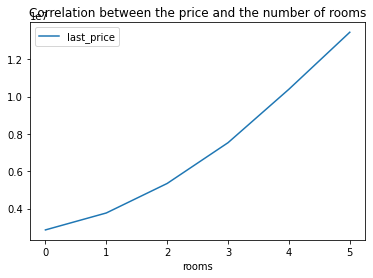

In [68]:
# correlation between the price and the number of rooms
rooms_prices = new_data.pivot_table(index='rooms', values='last_price', aggfunc='mean')
display(rooms_prices)
rooms_prices.plot(title = 'Correlation between the price and the number of rooms')

In [69]:
# price dependence on the distance from the center
print(new_data['last_price'].corr(new_data['cityCenters_nearest']))

-0.29805225985657063


In [70]:
# if price depends on which floor the apartment is located: first, last or other
first_floor = new_data.query('floor_group == "first"')
last_floor = new_data.query('floor_group == "last"')
other_floor = new_data.query('floor_group == "other"')

print(first_floor['last_price'].describe().apply(lambda x: format(x, 'f')), '\n')
print(last_floor['last_price'].describe().apply(lambda x: format(x, 'f')))
print(other_floor['last_price'].describe().apply(lambda x: format(x, 'f')))

count        2215.000000
mean      4291911.996388
std       3087423.898432
min        440000.000000
25%       2700000.000000
50%       3750000.000000
75%       5000000.000000
max      50000000.000000
Name: last_price, dtype: object 

count        2482.000000
mean      5240652.017325
std       4410213.606982
min         12190.000000
25%       2972500.000000
50%       4150000.000000
75%       6000000.000000
max      64990000.000000
Name: last_price, dtype: object
count        13818.000000
mean       5768200.680923
std        4765706.767074
min         450000.000000
25%        3500000.000000
50%        4600000.000000
75%        6500000.000000
max      124000000.000000
Name: last_price, dtype: object


In [71]:
# dependence of the price on the date of posting: day of the week, month and year
weekday_price = new_data.pivot_table(index='weekday', values='last_price', aggfunc='mean')
display(weekday_price)
print(new_data['last_price'].corr(new_data['weekday']))

month_price = new_data.pivot_table(index='month', values='last_price', aggfunc='mean')
display(month_price)
print(new_data['last_price'].corr(new_data['month']))

year_price = new_data.pivot_table(index='year', values='last_price', aggfunc='mean')
display(year_price)
print(new_data['last_price'].corr(new_data['year']))

,last_price
weekday,
0,5.477777e+06
1,5.563800e+06
2,5.408428e+06
3,5.616195e+06
4,5.528364e+06
5,5.629015e+06
6,5.382201e+06


0.0014218456607801959


,last_price
month,
1,5.473083e+06
2,5.510435e+06
3,5.371554e+06
4,5.499017e+06
5,5.617407e+06
6,5.544395e+06
7,5.574002e+06
8,5.530397e+06
9,5.732533e+06


0.004881443373224374


,last_price
year,
2015,6.290271e+06
2016,5.806899e+06
2017,5.600258e+06
2018,5.316143e+06
2019,5.526337e+06


-0.03913395416571107


As a result, we can observe the following: 

1) There is a dependence of the price on the area - the larger the area, the higher the price. 

2) There is a dependence of the price on the number of rooms - the more rooms, the higher the price. 

3) There is a dependence of the price on the distance from the center - the price is lower if the center is further away. 

4) There is a dependence of the price on which floor the apartment is located:  first, last or other - the apartment on the first floor is cheaper. 

5) There is a dependence of the price on the date of placement: the day of the week, month and year, but it is weak.

In [72]:
# next we are looking for  top-10 localities with the largest number of ads
top_10_locality = new_data.groupby(
    ['locality_name']).agg({'days_exposition': 'count'}).sort_values(by='days_exposition', ascending=False
                                                                                                   )
print(top_10_locality.head(10))

                   days_exposition
locality_name                     
Санкт-Петербург              12191
посёлок Мурино                 515
посёлок Шушары                 385
Всеволожск                     308
Колпино                        292
посёлок Парголово              286
Пушкин                         276
деревня Кудрово                266
Гатчина                        243
Выборг                         193


In [73]:
# finding the average cost per square meter in St. Petersburg 
spb = new_data.query('locality_name == "Санкт-Петербург"')
spb_mean1 = spb['square_meter'].mean()
spb_mean = ("%.0f" % spb_mean1)
print('The average cost per square meter in St. Petersburg', spb_mean)

The average cost per square meter in St. Petersburg 110060


In [76]:
#  finding the average cost per square meter in Murino 
murino = new_data.query('locality_name == "посёлок Мурино"')
murino_mean1 = murino['square_meter'].mean()
murino_mean = ("%.0f" % murino_mean1)
print('The average cost per square meter in Murino', murino_mean)

The average cost per square meter in Murino 85957


In [75]:
# finding the average cost per square meter in  Shushari
shushari = new_data.query('locality_name == "посёлок Шушары"')
shushari_mean1 = shushari['square_meter'].mean()
shushari_mean = ("%.0f" % spb_mean1)
print('The average cost per square meter in Shushari', shushari_mean)

The average cost per square meter in Shushari 110060


In [84]:
#  finding the average cost per square meter in Vsevolozhsk 
vsev = new_data.query('locality_name == "Всеволожск"')
vsev_mean1 = vsev['square_meter'].mean()
vsev_mean = ("%.0f" % vsev_mean1)
print('The average cost per square meter in Vsevolozhsk', vsev_mean)

The average cost per square meter in Vsevolozhsk 68606


In [78]:
#  finding the average cost per square meter in Kolpino
koplino = new_data.query('locality_name == "Колпино"')
koplino_mean1 = koplino['square_meter'].mean()
koplino_mean = ("%.0f" % koplino_mean1)
print('The average cost per square meter in Kolpino', koplino_mean)

The average cost per square meter in Kolpino 74672


In [79]:
#  finding the average cost per square meter in Pargolovo  
pargolovo = new_data.query('locality_name == "посёлок Парголово"')
pargolovo_mean1 = pargolovo['square_meter'].mean()
pargolovo_mean = ("%.0f" % pargolovo_mean1)
print('The average cost per square meter in Pargolovo', pargolovo_mean)

The average cost per square meter in Pargolovo 89361


In [80]:
#  finding the average cost per square meter in Pushkin
pushkin = new_data.query('locality_name == "Пушкин"')
pushkin_mean1 = pushkin['square_meter'].mean()
pushkin_mean = ("%.0f" % pushkin_mean1)
print('The average cost per square meter in Pushkin', pushkin_mean)

The average cost per square meter in Pushkin 101892


In [81]:
#  finding the average cost per square meter in  Kudrovo 
kudrovo = new_data.query('locality_name == "деревня Кудрово"')
kudrovo_mean1 = kudrovo['square_meter'].mean()
kudrovo_mean = ("%.0f" % kudrovo_mean1)
print('The average cost per square meter in Kudrovo', kudrovo_mean)

The average cost per square meter in Kudrovo 92657


In [82]:
#  finding the average cost per square meter in  Gatchina 
gatchina = new_data.query('locality_name == "Гатчина"')
gatchina_mean1 = gatchina['square_meter'].mean()
gatchina_mean = ("%.0f" % gatchina_mean1)
print('The average cost per square meter in Gatchina', gatchina_mean)

The average cost per square meter in Gatchina 68077


In [83]:
#  finding the average cost per square meter in Viborg 
viborg = new_data.query('locality_name == "Выборг"')
viborg_mean1 = viborg['square_meter'].mean()
viborg_mean = ("%.0f" % viborg_mean1)
print('The average cost per square meter in Viborg', viborg_mean)

The average cost per square meter in Viborg 57011


The localities  with the highest cost of housing are St. Petersburg, Shushary and Pushkin. The localities with the lowest cost of housing are Vyborg, Vsevolozhsk and Gatchina.

/tmp/ipykernel_49/3968121712.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb_data['centre_distance_km'] = (spb_data['cityCenters_nearest'] / 1000).round()


<AxesSubplot:xlabel='centre_distance_km'>

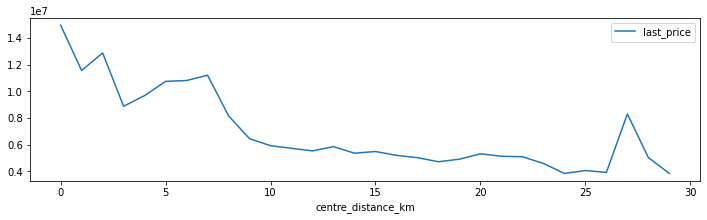

In [85]:
# studying apartment offers
spb_data = new_data.query('locality_name == "Санкт-Петербург"')
spb_data['centre_distance_km'] = (spb_data['cityCenters_nearest'] / 1000).round()
spb_data.groupby(['centre_distance_km']).agg({'last_price': 'mean'}).round().plot(figsize=(12,3))

We have built a graph that shows how the price changes for each km away from the center. From the graph we can see that the price changes dramatically at the distance of 7 km. This means that the apartments "in the center" are located no further than 7 km. It is also interesting to observe the price rockets after 25 km. Perhaps this is some kind of an elite village.

In [86]:
# selecting and studying the segment of apartments in the center
flats_centre = new_data.query('cityCenters_nearest <= 7000')
# let's see which locality_name values are left in the dataframe
flats_centre['locality_name'].value_counts()

Санкт-Петербург    2147
unknown              11
Name: locality_name, dtype: int64

count    2158.000000
mean       77.408387
std        32.224279
min        12.000000
25%        52.275000
50%        72.000000
75%        96.000000
max       179.600000
Name: total_area, dtype: float64

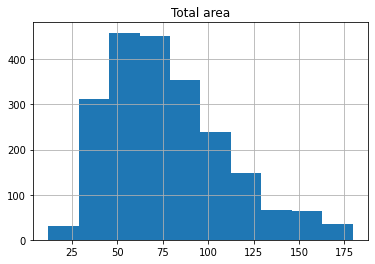

In [87]:
# let's study the following parameters: area, price, number of rooms, ceiling height
# let's look at the area
flats_centre['total_area'].hist()
plt.title('Total area')
flats_centre['total_area'].describe()

count         2158.000000
mean      10593644.920760
std        8552630.944392
min        1600000.000000
25%        6200000.000000
50%        8277475.000000
75%       11972500.000000
max      124000000.000000
Name: last_price, dtype: object

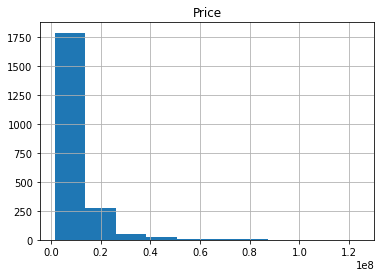

In [88]:
# checking the price
flats_centre['last_price'].hist()
plt.title('Price')
flats_centre['last_price'].describe().apply(lambda x: format(x, 'f'))

count    2158.000000
mean        2.528267
std         1.069616
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: rooms, dtype: float64

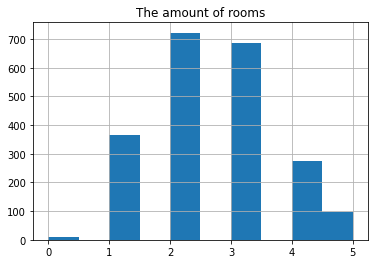

In [89]:
# Checking the amount of rooms
flats_centre['rooms'].hist()
plt.title('The amount of rooms')
flats_centre['rooms'].describe()

count    2158.000000
mean        2.920181
std         0.317108
min         2.400000
25%         2.700000
50%         2.750000
75%         3.100000
max         4.800000
Name: ceiling_height, dtype: float64

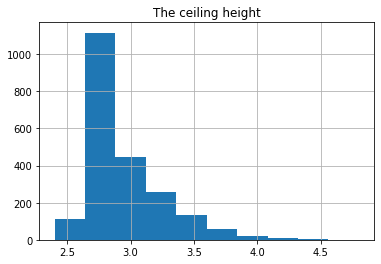

In [91]:
# checking the ceiling height
flats_centre['ceiling_height'].hist()
plt.title('The ceiling height')
flats_centre['ceiling_height'].describe()

The histograms show that in the center small apartments p(from 30 to 160 meters) prevail, with a standard ceiling height (2.7 meters), the average price exceeds 8000000 rubles and these apartments are mostly 2 or 3-room apartments.

,last_price
rooms,
0,4.143273e+06
1,6.513363e+06
2,8.978067e+06
3,1.262267e+07
4,1.395467e+07
5,1.484689e+07


<AxesSubplot:title={'center':'Correlation between the price and the amount of rooms'}, xlabel='rooms'>

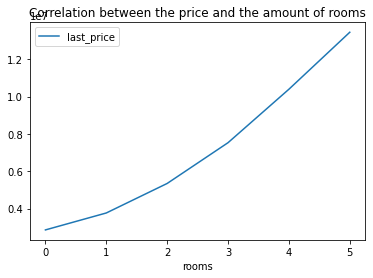

In [92]:
# let's highlight the factors that affect the cost of an apartment (number of rooms, floor, distance from the center, date of placement of the ad)
# let's start with the number of rooms
rooms_prices_centre = flats_centre.pivot_table(index='rooms', values='last_price', aggfunc='mean')
display(rooms_prices_centre)
rooms_prices.plot(title = 'Correlation between the price and the amount of rooms')


0.15920318710354028


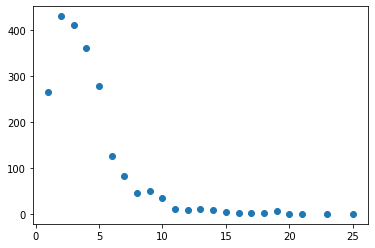

In [93]:
# correlation between the floor and the price
flats_centre['floor'].value_counts().plot(style='o')
print(flats_centre['last_price'].corr(flats_centre['floor']))

In [94]:
# the correlation between price and distance from the center
print(flats_centre['last_price'].corr(flats_centre['cityCenters_nearest']))

-0.030800103372010175


,last_price
first_day_exposition,
2015-02-26,7700000.0
2015-03-12,5900000.0
2015-03-23,3400000.0
2015-04-06,13400000.0
2015-04-28,11000000.0
...,...
2019-04-12,9000000.0
2019-04-16,6190000.0
2019-04-18,7200000.0


<AxesSubplot:xlabel='first_day_exposition'>

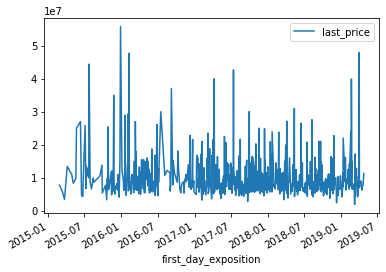

In [95]:
# the corralation between the floor and the ad placement date
price_to_date = (flats_centre.pivot_table(index='first_day_exposition', values='last_price', aggfunc='median').round())
display(price_to_date)
price_to_date.plot()


### Conclusion


The main factor affecting the cost of an apartment in the center is the number of rooms. The floor has little effect on the price, but there  a slight dependence can still be observed. From the data it can be seen that there are peaks on the graph of the dependence of the price on the day, but this can be explained by the sale of individual expensive apartments. There is practically no dependence between the price and distance from the center here, because the apartments are located in the center anyway.

If we compare the factors affecting the cost of apartments in the center and in all the districts studied above, we can see that the distance from the center played an important role when it came to all apartments from the database, however, this dependence disappeared when we considered apartments in the center. There is also a stronger dependence on the floor throughout the city, and while in the center the floor does not affect the cost so much. The strongest dependence, which is visible both in the center and throughout the city, is the dependence of the price on the number of rooms. The most insignificant dependence is observed between the price and the date of sale.


## General conclusion

In this project the data from the archive of ads for the sale of apartments in St. Petersburg and neighboring localities for several years was analyzed. It was necessary to determine the market value of real estate items, set parameters, and build an automated system: it will track anomalies and fraud activity.

Two types of data were available for each apartment for sale. The first ones are filled in by the user, the second ones are obtained automatically based on cartographic data. For example, the distance to the center, the airport, the nearest park or a pond.


At the first stage, the data was uploaded. At first, it was necessary to use the separator 'sep' in order for the data to be  readable. Then we studied the data and identified and studied the missing values.

The table originally had 22 columns and 23699 rows. The data type in all columns is either bool, float64, int64, or object. The data was checked using the value_counts(), min(), max() methods. There were a lot of gaps in many columns. The data was uploaded from two sources, including one of the sources was filled in manually, perhaps this was the reason for such a large number of gaps. The gaps were filled with various data:
* in `ceiling_height`  all the gaps were replaced with the standard ceiling height in the new building;
* in `floors_total` all the gaps were replaced with the average height of apartment buildings, i.e. 16;
* in `is_apartment` the share of gaps is significant, but they should be replaced with False, since people with apartments would answer "yes";
* in `balcony` it is logical to replace the gaps with 0, since if a person did not specify the number of balconies, apparently there are none;
* in `locality_name` the gaps can be replaced with unknown, their share is insignificant;
* in `airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest`, the gaps were replaced with median values. 

While filling in the gaps, some data types were also replaced. The first_day_exposition column was converted to datetime64, is_apartment - into bool. We also removed the option name "town" and replaced it with "village".

At the next stage of the project, the data was calculated and added:

- the price per square meter;
- day of the week, month and year of publication of the ad;
- apartment floor; options — first, last, other;
- the ratio of residential and total area, as well as the ratio of kitchen area to total.

At the stage of the exploratory analysis, the following parameters were  studied: 
area, price, number of rooms, ceiling height and time of sale of apartments. For this purpose, histograms and span diagrams were created for each parameter. This allowed us to identify anomalies in the data and get rid of them. So the span diagram for the time of sale confirms that values greater than 500 go beyond the span, which means that this is an unusually long sale. The lower range coincides with zero, which means that even sales faster than 45 days are not anomalies, but they are rare. Outliers were detected in the rooms column. From the diagrams we see that apartments with more than 6 rooms are anomalies. In the total_area column, outliers start with a value of 180 m. For last_price, the normal price can be considered from 1000000 to 35000000.

At the next stage, we detected the dependence of the price on the area, the number of rooms, the distance from the center and on which floor the apartment is located: the first, last or other. We also studied the dependence on the date of placement: day of the week, month and year. As a result, the dependence of the price on the first 4 factors was revealed (the larger the area, the higher the price, the more rooms, the higher the price, the price is lower if the center is further away, the apartment is cheaper on the ground floor). It was also revealed that there is a dependence of the price on the date of placement, but it is weak.

Next, 10 localities with the largest number of ads were selected. We calculated the average price per square meter in these localities and identified the localities with the highest and lowest housing costs (St. Petersburg, Shushary, Pushkin Vyborg, Vsevolozhsk and Gatchina, respectively).

Then we found out which area is included in the center - 7 km. To do this, we built a graph of the dependence of the price change on the kilometer distance from the center and studied the ads within this framework. The following parameters were analyzed: area, price, number of rooms, ceiling height. Also we highlighted the factors that affect the cost of the apartment. The main factor is the number of rooms. We observed a weak relationship between price and floor, but noticed that there is practically no relationship between the price and distance from the center here, because apartments are already located in the center.

Then we compared the factors affecting the cost of apartments in the center and in all the districts that were studied above and noticed that the distance from the center played an important role when it came to all apartments from the database, however, this dependence disappeared when we considered apartments in the center. There is also a stronger dependence on the floor throughout the city, and while in the center the floor did not affect the cost so much. The strongest dependence, which is visible both in the center and throughout the city, is the dependence of the price on the number of rooms. The most insignificant dependence is observed between the price and the date of sale.






